<a href="https://colab.research.google.com/github/Luckywagh63/Edunet_soildetect/blob/main/soil_fertility_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree, ensemble
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
rawData = pd.read_csv('dataset1.csv')
rawData.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1


In [8]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       880 non-null    int64  
 1   P       880 non-null    float64
 2   K       880 non-null    int64  
 3   pH      880 non-null    float64
 4   EC      880 non-null    float64
 5   OC      880 non-null    float64
 6   S       880 non-null    float64
 7   Zn      880 non-null    float64
 8   Fe      880 non-null    float64
 9   Cu      880 non-null    float64
 10  Mn      880 non-null    float64
 11  B       880 non-null    float64
 12  Output  880 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 89.5 KB


No null values

In [113]:
rawData.columns = rawData.columns.str.strip()  # Remove unwanted spaces

rawData.rename(columns={
    'n': 'Nitrogen',
    'p': 'Phosphorous',
    'k': 'Potassium',
    'ph': 'pH',
    'ec': 'Electrical_Conductivity',
    'oc': 'Organic_Carbon',
    's': 'Sulfur',
    'zn': 'Zinc',
    'fe': 'Iron',
    'cu': 'Copper',
    'mn': 'Manganese',
    'b': 'Boron',
    'soil_fertility':'output'
}, inplace=True)

print(rawData.columns)  # Verify changes


Index(['nitrogen', 'phosphorous', 'potassium', 'pH', 'electrical_conductivity',
       'organic_carbon', 'sulfur', 'zinc', 'iron', 'copper', 'manganese',
       'boron', 'output'],
      dtype='object')


In [114]:
rawData.describe()

,nitrogen,phosphorous,potassium,pH,electrical_conductivity,organic_carbon,sulfur,zinc,iron,copper,manganese,boron,output
count,880.00000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,246.73750,14.562159,499.978409,7.510500,0.543659,0.617989,7.545080,0.469273,4.140523,0.952443,8.666500,0.590159,0.588636
std,77.38886,21.967755,124.222838,0.464912,0.141597,0.842986,4.424184,1.894234,3.110011,0.465900,4.298828,0.570800,0.575462
min,6.00000,2.900000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.000000
25%,201.00000,6.800000,412.000000,7.350000,0.430000,0.380000,4.700000,0.280000,2.050000,0.630000,6.225000,0.270000,0.000000
50%,257.00000,8.100000,475.000000,7.500000,0.545000,0.590000,6.640000,0.360000,3.565000,0.930000,8.345000,0.405000,1.000000
75%,307.00000,10.550000,581.000000,7.630000,0.640000,0.780000,8.750000,0.470000,6.320000,1.250000,11.472500,0.610000,1.000000
max,383.00000,125.000000,887.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,2.000000


In [115]:
print(rawData.columns)



Index(['nitrogen', 'phosphorous', 'potassium', 'pH', 'electrical_conductivity',
       'organic_carbon', 'sulfur', 'zinc', 'iron', 'copper', 'manganese',
       'boron', 'output'],
      dtype='object')


In [116]:
rawData.columns = rawData.columns.str.strip()

In [117]:
print([repr(col) for col in rawData.columns])



["'nitrogen'", "'phosphorous'", "'potassium'", "'pH'", "'electrical_conductivity'", "'organic_carbon'", "'sulfur'", "'zinc'", "'iron'", "'copper'", "'manganese'", "'boron'", "'output'"]


In [118]:
rawData.columns = rawData.columns.str.strip().str.lower()
print(rawData.columns)  # Verify again

# Now try again
print(rawData['output'].value_counts())



Index(['nitrogen', 'phosphorous', 'potassium', 'ph', 'electrical_conductivity',
       'organic_carbon', 'sulfur', 'zinc', 'iron', 'copper', 'manganese',
       'boron', 'output'],
      dtype='object')
output
1    440
0    401
2     39
Name: count, dtype: int64


In [119]:
# Assuming the column name has leading or trailing spaces, strip them:
rawData.columns = rawData.columns.str.strip()

# Now, try to access the 'fertility' column:
rawData['output'].value_counts()

,count
output,
1,440
0,401
2,39


In [120]:
rawData['output'].value_counts()

,count
output,
1,440
0,401
2,39


- 0 describes low-fertility
- 1 describes medium-fertility
- 2 describes high-fertility

In [121]:
rawDataCopy = rawData.copy()
rawDataCopy.head()

,nitrogen,phosphorous,potassium,ph,electrical_conductivity,organic_carbon,sulfur,zinc,iron,copper,manganese,boron,output
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1


In [122]:
corr = rawDataCopy.corr()

<Axes: >

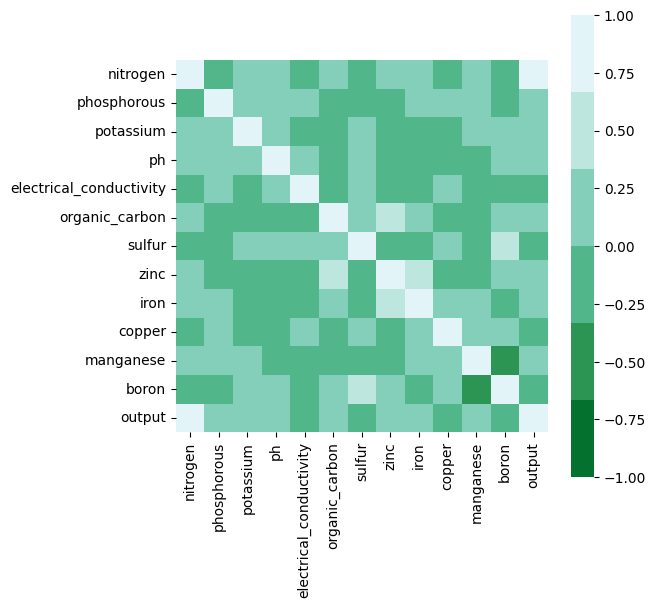

In [123]:
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr,
    cmap=sns.color_palette("BuGn_r"),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

In [124]:
labels = rawDataCopy[['output']]
features = rawDataCopy.drop('output', axis=1)

In [125]:
features.head()

,nitrogen,phosphorous,potassium,ph,electrical_conductivity,organic_carbon,sulfur,zinc,iron,copper,manganese,boron
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26


In [126]:
labels.head()

,output
0,0
1,0
2,0
3,0
4,1


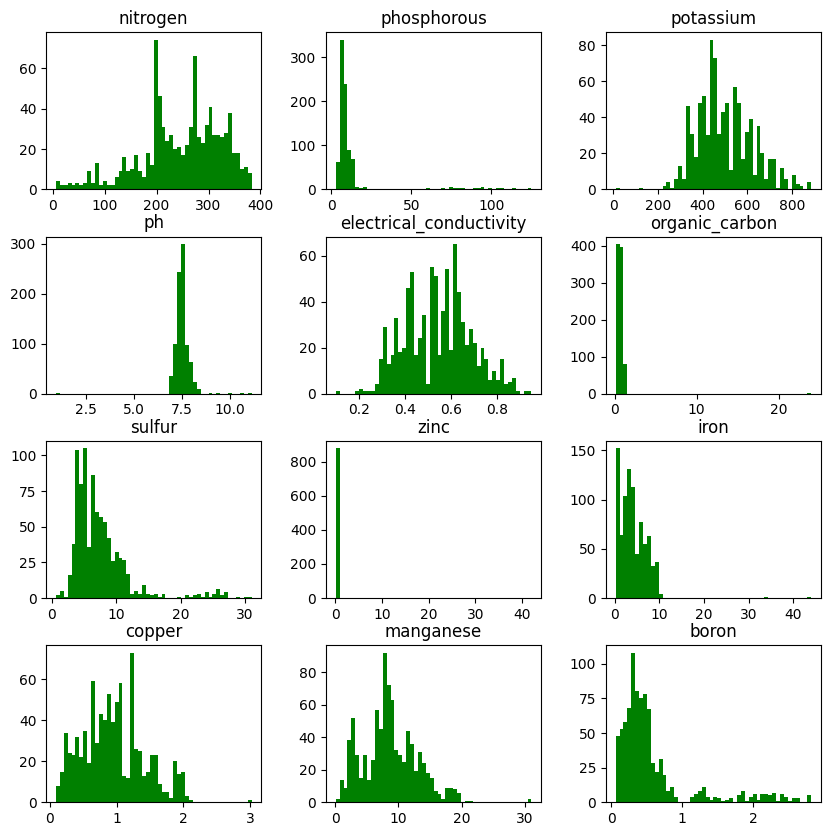

In [127]:
features.hist(bins=50, figsize=(10, 10), color ='green', grid=False)
plt.show()

In [128]:
transformedFeatures = features.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)

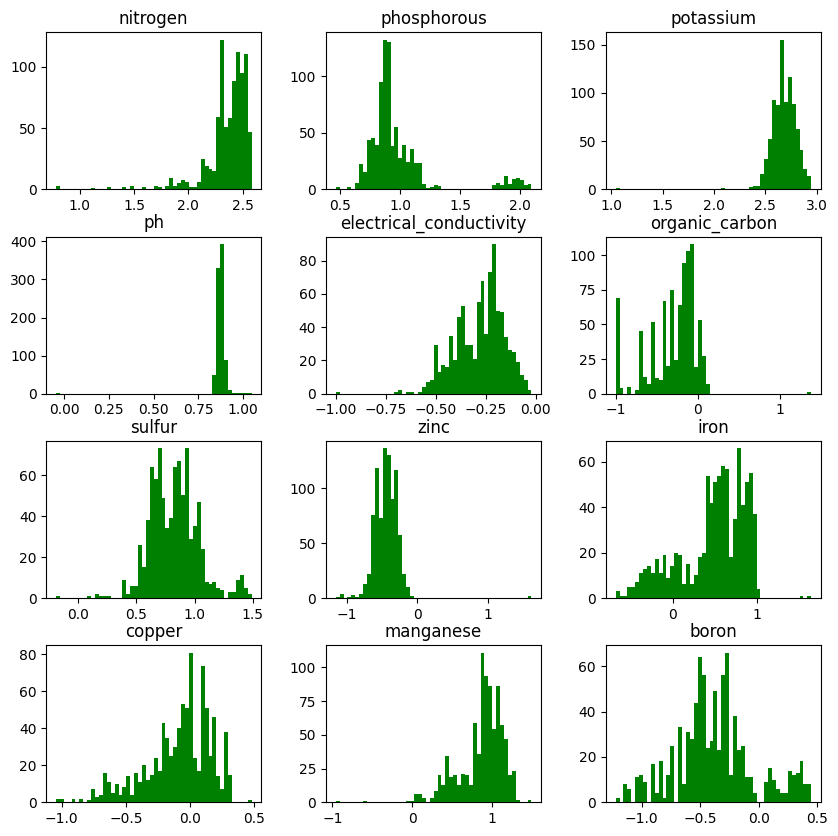

In [129]:
transformedFeatures.hist(bins=50, figsize=(10, 10), color='green', grid=False)
plt.show()

In [130]:
from sklearn.model_selection import train_test_split

trainInput, validationInput, trainTarget, validationTarget = train_test_split(transformedFeatures, labels, test_size = 0.2, shuffle=True, random_state = 42)
print("Train Data Shape: ", trainInput.shape)

Train Data Shape:  (704, 12)


In [131]:
trainTarget = trainTarget.values.ravel()

In [132]:
svcClf = SVC()
svcClf.fit(trainInput, trainTarget)

SVC()

In [133]:
forestClf = ensemble.RandomForestClassifier()
forestClf.fit(trainInput, trainTarget)

RandomForestClassifier()

In [134]:
nbClf = GaussianNB()
nbClf.fit(trainInput, trainTarget)

GaussianNB()

In [135]:
knnClf = KNeighborsClassifier()
knnClf.fit(trainInput, trainTarget)

KNeighborsClassifier()

In [136]:
treeClf = tree.DecisionTreeClassifier()
treeClf.fit(trainInput, trainTarget)

DecisionTreeClassifier()

SVC  accuarcy is  0.7897727272727273
RandomForestClassifier  accuarcy is  0.8693181818181818
GaussianNB  accuarcy is  0.5795454545454546
KNeighborsClassifier  accuarcy is  0.7329545454545454
DecisionTreeClassifier  accuarcy is  0.8522727272727273


<Axes: >

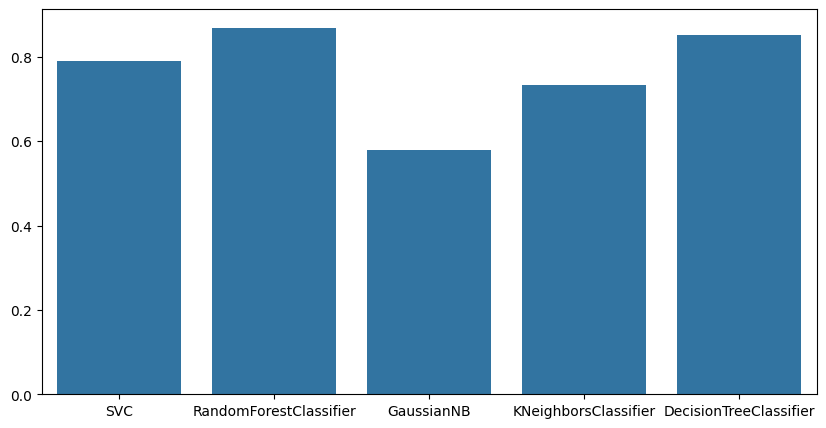

In [137]:
models = [svcClf, forestClf, nbClf, knnClf, treeClf]
accs = []
titles = []

for model in models:
    pred = model.predict((validationInput))
    model_acc = accuracy_score(validationTarget, pred)
    accs.append(model_acc)
    titles.append(type(model).__name__)
    print(type(model).__name__, " accuarcy is ", model_acc)

fig = plt.figure(figsize=(10, 5))
sns.barplot(x = titles, y=accs)

In [138]:
forestClassifier = ensemble.RandomForestClassifier(random_state=42)

In [139]:
paramGrid = {
    'n_estimators': [100, 300],  # Remove 500
    'max_features': ['sqrt', 'log2'],  # Remove 'auto'
    'max_depth' : [5, 10],  # Remove intermediate depths
    'criterion' : ['gini']  # Remove 'entropy'
}


In [140]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(estimator=forestClassifier, param_grid=paramGrid, cv= 5)
#clf.fit(trainInput, trainTarget)

In [141]:
clf.fit(trainInput, trainTarget)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini'], 'max_depth': [5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 300]})

In [143]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 300}

In [144]:
randomForestModel = ensemble.RandomForestClassifier(criterion = 'gini',
 max_depth = 10,
 max_features = 'sqrt',
 n_estimators = 300, random_state=42)

In [145]:
randomForestModel.fit(trainInput, trainTarget)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

In [146]:
predictions = randomForestModel.predict(validationInput)

In [150]:
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [151]:
report = classification_report(validationTarget, predictions)
report

'              precision    recall  f1-score   support\n\n           0       0.88      0.96      0.92        78\n           1       0.86      0.89      0.87        88\n           2       0.00      0.00      0.00        10\n\n    accuracy                           0.87       176\n   macro avg       0.58      0.62      0.60       176\nweighted avg       0.82      0.87      0.84       176\n'

In [152]:
mode_acc = accuracy_score(validationTarget, predictions)
mode_acc

0.8693181818181818